# Liner Regression on Global Warming 

In [1]:
#Imports
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("GlobalWarming.csv")
data.head()
#raw=data

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149


In [3]:
#checking any null values are there.oops there's no null values
data.isnull().sum()


Year        0
Month       0
MEI         0
CO2         0
CH4         0
N2O         0
CFC-11      0
CFC-12      0
TSI         0
Aerosols    0
Temp        0
dtype: int64

In [4]:
#checking the datatypes
data.dtypes

Year          int64
Month         int64
MEI         float64
CO2         float64
CH4         float64
N2O         float64
CFC-11      float64
CFC-12      float64
TSI         float64
Aerosols    float64
Temp        float64
dtype: object

In [5]:
#shape of the dataframe
data.shape

(308, 11)

In [6]:
data.Year.unique()

array([1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008])

In [7]:
#summary statistics
data.describe()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,1995.662338,6.551948,0.275555,363.226753,1749.824513,312.391834,251.973068,497.524782,1366.070759,0.016657,0.256776
std,7.423197,3.447214,0.937918,12.647125,46.051678,5.225131,20.231783,57.826899,0.399610,0.029050,0.179090
min,1983.000000,1.000000,-1.635000,340.170000,1629.890000,303.677000,191.324000,350.113000,1365.426100,0.001600,-0.282000
25%,1989.000000,4.000000,-0.398750,353.020000,1722.182500,308.111500,246.295500,472.410750,1365.717050,0.002800,0.121750
50%,1996.000000,7.000000,0.237500,361.735000,1764.040000,311.507000,258.344000,528.356000,1365.980900,0.005750,0.248000
75%,2002.000000,10.000000,0.830500,373.455000,1786.885000,316.979000,267.031000,540.524250,1366.363250,0.012600,0.407250
max,2008.000000,12.000000,3.001000,388.500000,1814.180000,322.182000,271.494000,543.813000,1367.316200,0.149400,0.739000


In [8]:
##corr table
data.corr()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
Year,1.000000,-0.025789,-0.145345,0.985379,0.910563,0.994850,0.460965,0.870067,0.022353,-0.361884,0.755731
Month,-0.025789,1.000000,-0.016345,-0.096287,0.017558,0.012395,-0.014914,-0.001084,-0.032754,0.014845,-0.098016
MEI,-0.145345,-0.016345,1.000000,-0.152911,-0.105555,-0.162375,0.088171,-0.039836,-0.076826,0.352351,0.135292
CO2,0.985379,-0.096287,-0.152911,1.000000,0.872253,0.981135,0.401284,0.823210,0.017867,-0.369265,0.748505
CH4,0.910563,0.017558,-0.105555,0.872253,1.000000,0.894409,0.713504,0.958237,0.146335,-0.290381,0.699697
N2O,0.994850,0.012395,-0.162375,0.981135,0.894409,1.000000,0.412155,0.839295,0.039892,-0.353499,0.743242
CFC-11,0.460965,-0.014914,0.088171,0.401284,0.713504,0.412155,1.000000,0.831381,0.284629,-0.032302,0.380111
CFC-12,0.870067,-0.001084,-0.039836,0.823210,0.958237,0.839295,0.831381,1.000000,0.189270,-0.243785,0.688944
TSI,0.022353,-0.032754,-0.076826,0.017867,0.146335,0.039892,0.284629,0.189270,1.000000,0.083238,0.182186
Aerosols,-0.361884,0.014845,0.352351,-0.369265,-0.290381,-0.353499,-0.032302,-0.243785,0.083238,1.000000,-0.392069


In [9]:
# Importing matplotlib and seaborn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Heat Map

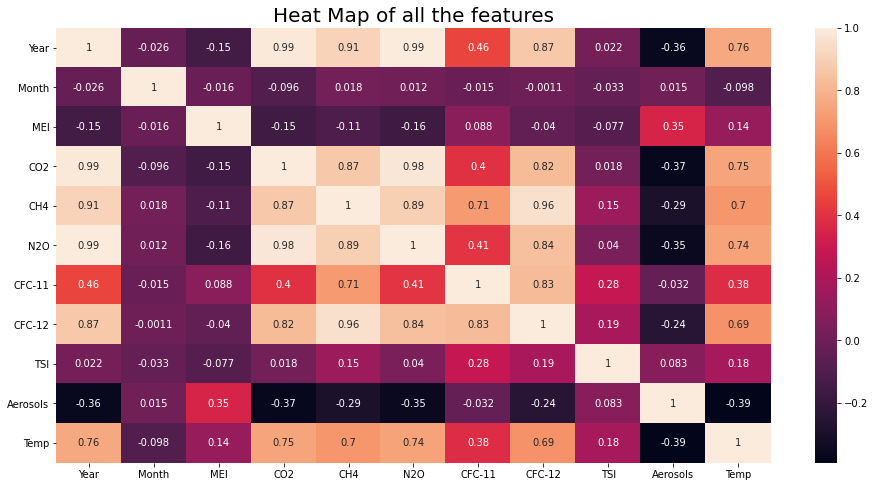

In [10]:
plt.figure(figsize = (16,8))
plt.title("Heat Map of all the features", size = 20)
sns.heatmap(data.corr(),annot = True)
plt.show()

#### From the heatmap, there is high correlation of temperature with CO2 with corr rate 0.75 folloed by N2O with 0.74.
#### CH4 has correlation rate of 0.7 with temp

### Checking for Multicollinearity

Text(0.5, 0.98, 'Pair plot for all the features')

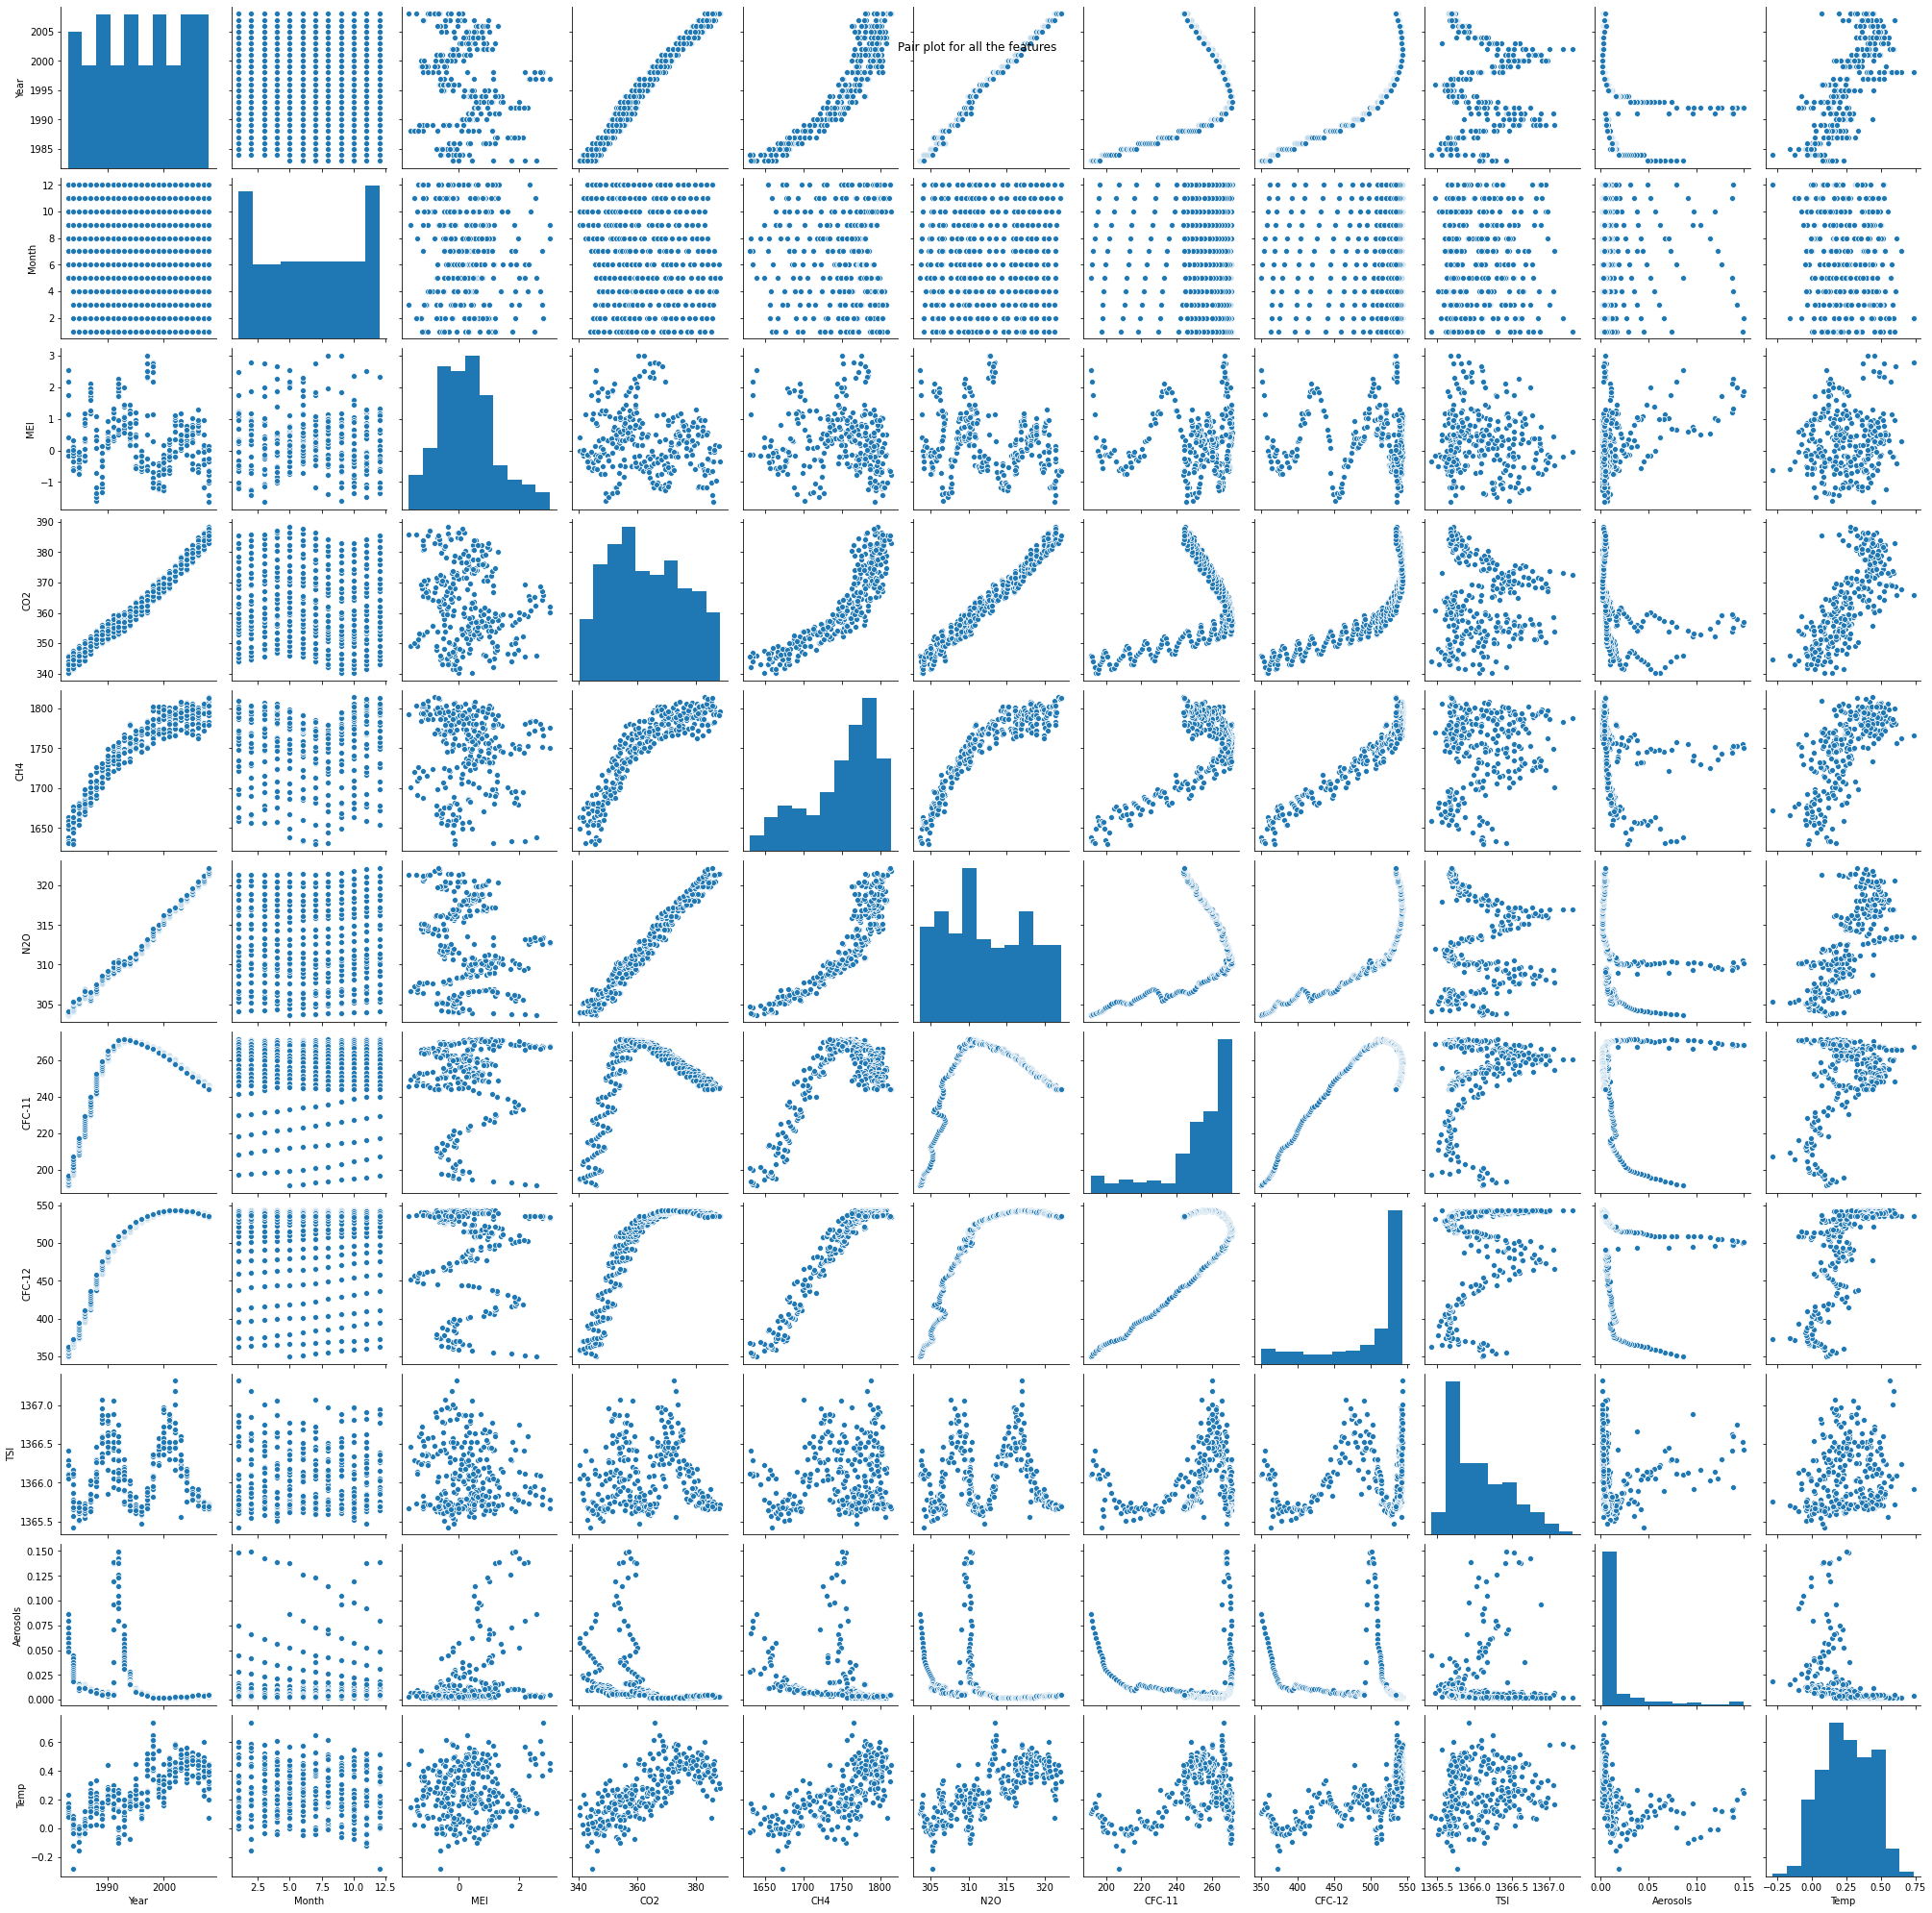

In [11]:
# let us plot pair plot for our understanding

g = sns.pairplot(data)
g.fig.suptitle("Pair plot for all the features")

In [12]:
#columns
data.columns

Index(['Year', 'Month', 'MEI', 'CO2', 'CH4', 'N2O', 'CFC-11', 'CFC-12', 'TSI',
       'Aerosols', 'Temp'],
      dtype='object')

In [13]:
raw=data.copy()
raw.columns=['Year','Month','MEI','CO2','CH4','N2O','CFC11','CFC12','TSI','Aerosols','Temp']
raw.head()

,Year,Month,MEI,CO2,CH4,N2O,CFC11,CFC12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149


In [14]:
import statsmodels.formula.api as smf
from patsy import dmatrices
import patsy

In [15]:
model1 = smf.ols('Temp ~ MEI+CO2+CH4+N2O +CFC11 +CFC12+ TSI+Aerosols', data=raw).fit()


In [16]:
#library for vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = model1.model.exog

vif1 = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif1

[13454981.483446594,
 1.2256958636480464,
 27.99610328105419,
 19.129507584320763,
 61.03745302018548,
 31.829321263531924,
 93.49818247345564,
 1.1409763102539896,
 1.35447009956284]

#### We can observe that the features are collinear with other features. Therefore, we pop the features to remove the collinearity

In [17]:
model2 = smf.ols('Temp ~ MEI+CO2+CH4+N2O +CFC11 + TSI+Aerosols', data=raw).fit()

In [18]:
#library for vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = model2.model.exog

vif2 = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif2

[13294463.802566227,
 1.2082133502180714,
 27.828286590155134,
 18.069706730342357,
 39.81368759362757,
 4.613597995435398,
 1.1402527516910357,
 1.329244557506287]

In [19]:
model3 = smf.ols('Temp ~ MEI+CO2+CH4 +CFC11 + TSI+Aerosols', data=raw).fit()

In [20]:
#library for vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = model3.model.exog

vif3 = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif3

[13286575.242852286,
 1.2071761873041988,
 7.312001000991996,
 12.479762713790219,
 3.768725049987,
 1.1345838246892797,
 1.3184259273416337]

In [21]:
model4 = smf.ols('Temp ~ MEI+CO2 +CFC11 + TSI+Aerosols', data=raw).fit()

In [22]:
#library for vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = model4.model.exog

vif3 = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif3

[13284513.442577127,
 1.1921076240252628,
 1.425480977449902,
 1.369342140936699,
 1.1338806590781065,
 1.3169186245140256]

* We have removed the features with high collinearity

In [23]:
raw1=raw.iloc[:,2:11]

In [24]:
raw1.head()

,MEI,CO2,CH4,N2O,CFC11,CFC12,TSI,Aerosols,Temp
0,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149


Text(0.5, 0.98, 'Pair plot for all the features')

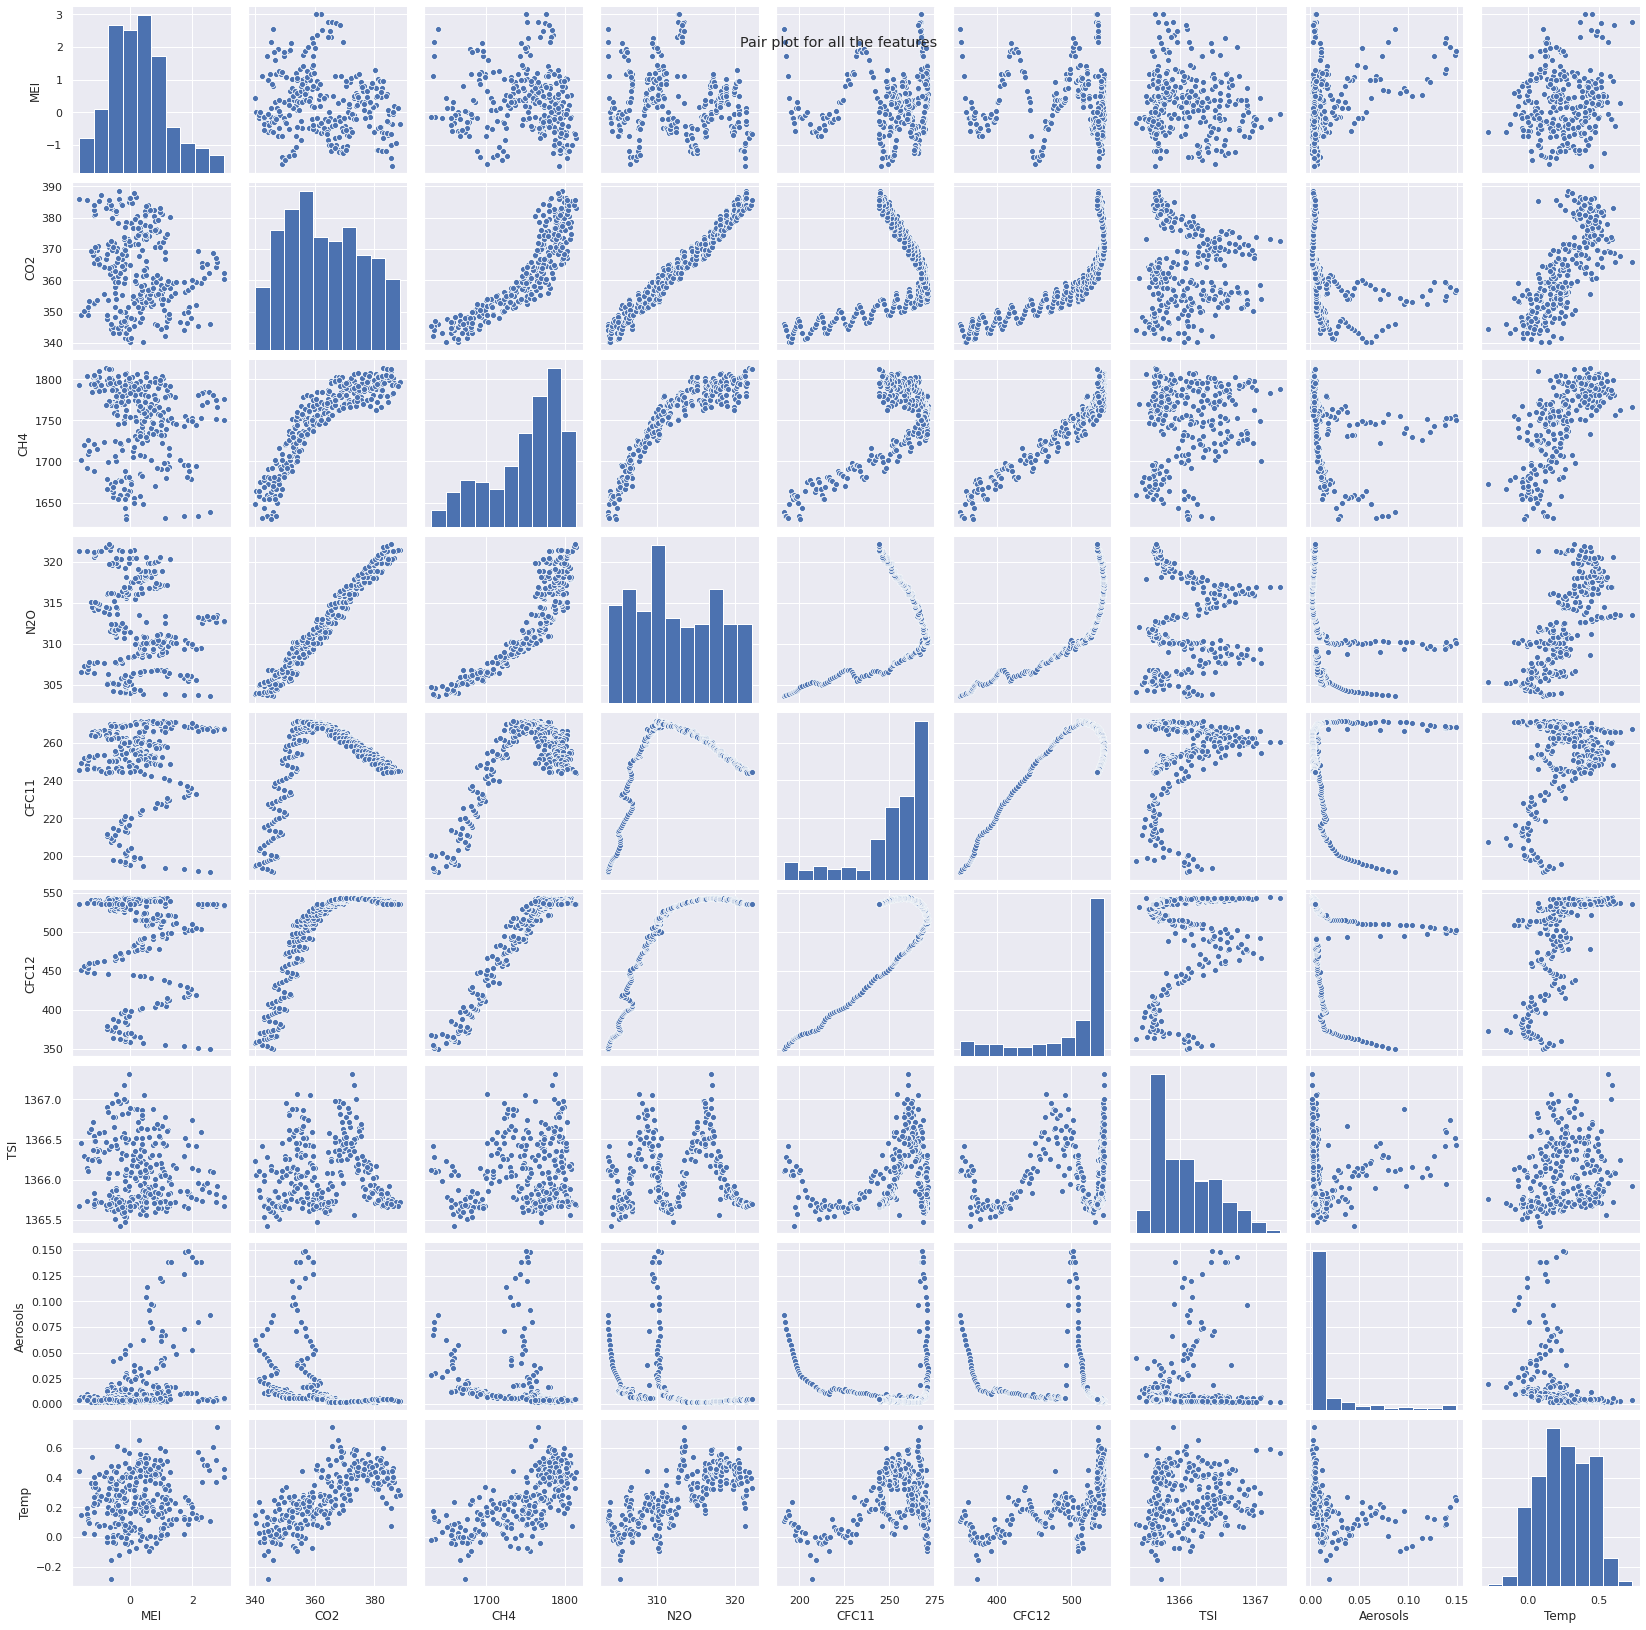

In [25]:
sns.set()
sns.pairplot(raw1).fig.suptitle("Pair plot for all the features")

# STATS MODELS - OLS

### MODEL-1

In [26]:
model1 = 'Temp ~ MEI+CO2+CH4+N2O +CFC11 +CFC12+ TSI+Aerosols'

result = smf.ols(formula = model1, data = raw1).fit()

In [27]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   Temp   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     108.6
Date:                Fri, 04 Dec 2020   Prob (F-statistic):           8.21e-84
Time:                        13:11:46   Log-Likelihood:                 303.02
No. Observations:                 308   AIC:                            -588.0
Df Residuals:                     299   BIC:                            -554.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -127.6958     19.191     -6.654      0.0

* The P value of CH4 is greater than 0.05. Therefore this feature needs to be removed.

### MODEL1 RESULTS

In [28]:
print("MSE: ", result.ssr/len(raw1))
print("RMSE: ", np.sqrt(result.ssr/len(raw1)))
print("R2: ", result.rsquared)
print("R2adj: ", result.rsquared_adj)
print("AIC: ", result.aic)
print("BIC: ", result.bic)

MSE:  0.008184260128792465
RMSE:  0.09046690073608395
R2:  0.7439939571287729
R2adj:  0.7371442971188404
AIC:  -588.0409430107441
BIC:  -554.4700449639819


In [29]:
pred1 =  result.predict(raw1)
pred1.head()

0    0.163070
1    0.148257
2    0.140195
3    0.113494
4    0.048863
dtype: float64

#### Regression PLOT

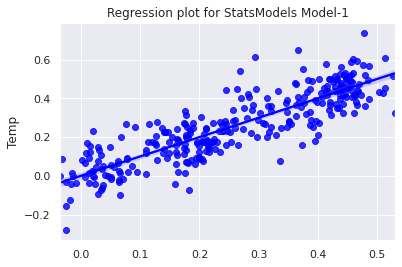

In [30]:
import seaborn as sns

sns.regplot(x= pred1, y= data.Temp, color = 'blue')
plt.title("Regression plot for StatsModels Model-1")
plt.show()

### since p value of ch4 is more than 0.05, it means there is no significance dependency on respnce variable.
### We delete that feature (CH4)

# MODEL-2

In [31]:
model2 = 'Temp ~ MEI+CO2+N2O +CFC11 +CFC12+ TSI+Aerosols'

result = smf.ols(formula = model2, data = raw1).fit()

In [32]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   Temp   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     124.5
Date:                Fri, 04 Dec 2020   Prob (F-statistic):           7.14e-85
Time:                        13:11:46   Log-Likelihood:                 303.01
No. Observations:                 308   AIC:                            -590.0
Df Residuals:                     300   BIC:                            -560.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -127.6250     19.151     -6.664      0.0

* The Model-2 has good RMSE values and the P values are less than 0.05

### RESULTS

In [33]:
print("MSE: ", result.ssr/len(raw1))
print("RMSE: ", np.sqrt(result.ssr/len(raw1)))
print("R2: ", result.rsquared)
print("R2adj: ", result.rsquared_adj)
print("AIC: ", result.aic)
print("BIC: ", result.bic)

MSE:  0.00818470866133402
RMSE:  0.09046937968911924
R2:  0.7439799269001077
R2adj:  0.7380061251944435
AIC:  -590.0240637528502
BIC:  -560.1832654890617


In [34]:
pred2 =  result.predict(raw1)
pred2.head()

0    0.162886
1    0.148515
2    0.140639
3    0.114243
4    0.048742
dtype: float64

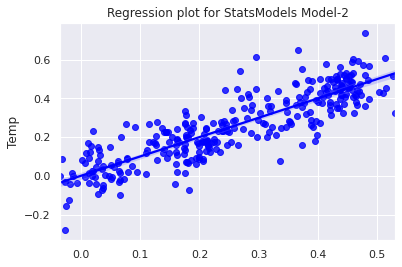

In [35]:
sns.regplot(pred2, data.Temp, color = 'blue')
plt.title("Regression plot for StatsModels Model-2")
plt.show()

# MODEL 3

In [36]:
model3 = 'Temp ~ MEI+CO2+CFC11 + TSI+Aerosols'

result = smf.ols(formula = model3, data = raw1).fit()

In [37]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   Temp   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     154.5
Date:                Fri, 04 Dec 2020   Prob (F-statistic):           5.08e-81
Time:                        13:11:47   Log-Likelihood:                 288.64
No. Observations:                 308   AIC:                            -565.3
Df Residuals:                     302   BIC:                            -542.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -138.8416     19.881     -6.984      0.0

* We can observe that the RMSE value is low. But, the P value for CFC-11 is more than 0.05. Therefore we need to pop the feature.

#### MODEL3 RESULTS

In [38]:
print("MSE: ", result.ssr/len(raw1))
print("RMSE: ", np.sqrt(result.ssr/len(raw1)))
print("R2: ", result.rsquared)
print("R2adj: ", result.rsquared_adj)
print("AIC: ", result.aic)
print("BIC: ", result.bic)

MSE:  0.008985275872117466
RMSE:  0.09479069507139119
R2:  0.7189379511491043
R2adj:  0.7142846059694536
AIC:  -565.2816246669481
BIC:  -542.9010259691066


In [39]:
pred3 =  result.predict(raw1)
pred3.head()

0    0.127063
1    0.109831
2    0.094318
3    0.057201
4   -0.020530
dtype: float64

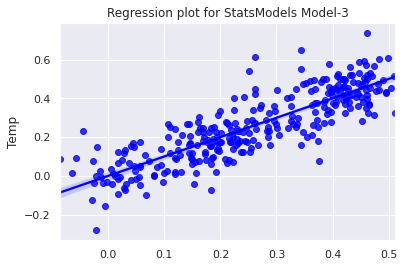

In [40]:
sns.regplot(pred3, data.Temp, color = 'blue')
plt.title("Regression plot for StatsModels Model-3")
plt.show()

# MODEL 4

In [41]:
model4 = 'Temp ~ MEI+CO2 + TSI+Aerosols'

result = smf.ols(formula = model4, data = raw1).fit()

In [42]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   Temp   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     193.8
Date:                Fri, 04 Dec 2020   Prob (F-statistic):           3.44e-82
Time:                        13:11:48   Log-Likelihood:                 288.64
No. Observations:                 308   AIC:                            -567.3
Df Residuals:                     303   BIC:                            -548.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -138.2575     18.849     -7.335      0.0

* The P values are less than 0.05 and the RMSE values are also less

In [43]:
print("MSE: ", result.ssr/len(raw1))
print("RMSE: ", np.sqrt(result.ssr/len(raw1)))
print("R2: ", result.rsquared)
print("R2adj: ", result.rsquared_adj)
print("AIC: ", result.aic)
print("BIC: ", result.bic)

MSE:  0.008985537581110689
RMSE:  0.09479207551852997
R2:  0.7189297648154975
R2adj:  0.7152192666612467
AIC:  -567.2726538576824
BIC:  -548.6221549428145


In [44]:
pred4 =  result.predict(raw1)
pred4.head()

0    0.125307
1    0.108145
2    0.092663
3    0.055619
4   -0.021889
dtype: float64

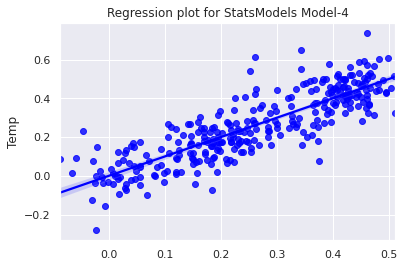

In [45]:
sns.regplot(pred4, data.Temp, color = 'blue')
plt.title("Regression plot for StatsModels Model-4")
plt.show()

# SUMMARY

* From the above 4 models, we can observe that the Model-1 and Model-2 have almost similar RMSE values.
* The Model-1 has lowest RMSE values among all the models

## Correlation between actual and predicted values

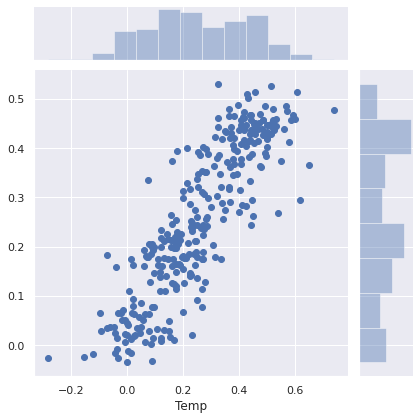

In [46]:
sns.jointplot(data.Temp,pred1)


* We can observe that the features are positively correlated

In [47]:
correlation = raw1.Temp.corr(pred4)
correlation

0.8478972607665969

* Our predictions are 84% correlated with actual values

In [48]:
r2=np.square(correlation)
r2

0.7189297648154984

# SK-LEARN LINEAR REGRESSION WITH TEST-TRAIN SPLIT

In [49]:
data.head()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149


In [50]:
data.shape

(308, 11)

# MODEL -1

In [51]:
X = data.iloc[:, :-1]
y = data.iloc[:, 10]

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [53]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
from sklearn import linear_model, metrics

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print("R2 SCORE: ",score)

print("MSE: ",metrics.mean_squared_error(y_test, regressor.predict(X_test)))

R2 SCORE:  0.7500893204365684
MSE:  0.006844221344486302


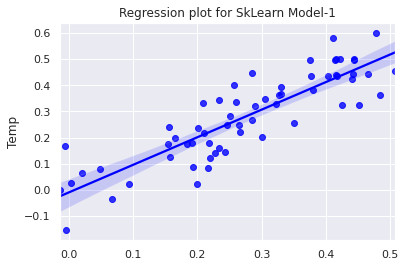

In [54]:
sns.regplot(y_pred, y_test, color = 'blue')
plt.title("Regression plot for SkLearn Model-1")
plt.show()

# MODEL 2

In [55]:
X = data[['MEI', 'CO2', 'N2O', 'CFC-11', 'CFC-12', 'TSI','Aerosols']]

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [57]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
from sklearn import linear_model, metrics

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print("R2 SCORE: ",score)

print("MSE: ",metrics.mean_squared_error(y_test, regressor.predict(X_test)))

R2 SCORE:  0.747657806782692
MSE:  0.0069108124068544335


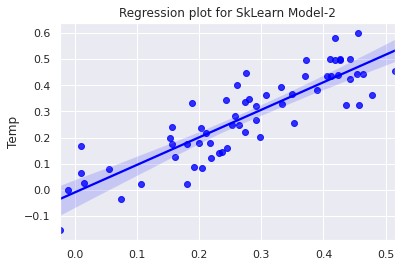

In [58]:
sns.regplot(y_pred, y_test, color = 'blue')
plt.title("Regression plot for SkLearn Model-2")
plt.show()

# MODEL-3

In [59]:
X = data[['MEI', 'CO2', 'CFC-11','TSI','Aerosols']]

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [61]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
from sklearn import linear_model, metrics

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print("R2 SCORE: ",score)

print("MSE: ",metrics.mean_squared_error(y_test, regressor.predict(X_test)))

R2 SCORE:  0.7045015220984228
MSE:  0.008092719339766566


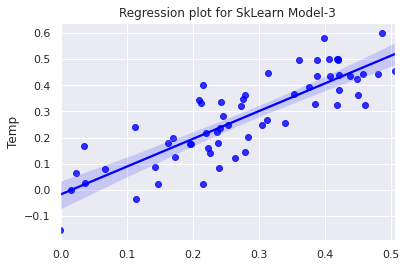

In [62]:
sns.regplot(y_pred, y_test, color = 'blue')
plt.title("Regression plot for SkLearn Model-3")
plt.show()

# MODEL-4

In [63]:
X = data[['MEI', 'CO2', 'TSI','Aerosols']]

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [65]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
from sklearn import linear_model, metrics

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print("R2 SCORE: ",score)

print("MSE: ",metrics.mean_squared_error(y_test, regressor.predict(X_test)))

R2 SCORE:  0.7088104354889706
MSE:  0.00797471255009816


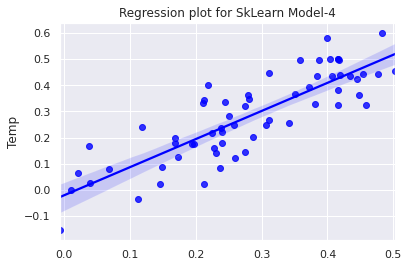

In [66]:
sns.regplot(y_pred, y_test, color = 'blue')
plt.title("Regression plot for SkLearn Model-4")
plt.show()

## Conclusion Sklearn Test-Train Split:
#### Model-1 & Model-2 has almost similar MSE scores
#### Model 1 has least Mean Squared Error
#### The results are similar to the Stats Models

# LINEAR REGRESSION WITH CROSSVALIDATION

# MODEL - 1

In [67]:
from sklearn.model_selection import cross_val_score
-cross_val_score(regressor, X, y, cv = 10, scoring = 'neg_mean_squared_error').mean()

0.010077575559097907

# MODEL - 2

In [68]:
X = data[['MEI', 'CO2', 'N2O', 'CFC-11', 'CFC-12', 'TSI','Aerosols']]
-cross_val_score(regressor, X, y, cv = 10, scoring = 'neg_mean_squared_error').mean()

0.009984286154481034

# MODEL - 3

In [69]:
X = data[['MEI', 'CO2', 'CFC-11','TSI','Aerosols']]
-cross_val_score(regressor, X, y, cv = 10, scoring = 'neg_mean_squared_error').mean()

0.010951233415290813

# MODEL - 4

In [70]:
X = data[['MEI', 'CO2','TSI','Aerosols']]
-cross_val_score(regressor, X, y, cv = 10, scoring = 'neg_mean_squared_error').mean()

0.010077575559097907

## Conclusions:
#### Model 2 has least Mean Squared Error

#### While Model 1 & Model 2 has almost similar scores


### From the above three implementations of Linear Regression, all the three implemenations are giving similar results.
### We can say that our models are working well as all the approaches are giving similar results

# Time Series Forecasting on Avocado Prices 

## Data Loading 

In [71]:
import warnings
warnings.filterwarnings("ignore")

import itertools
import pandas as pd
import numpy as np
from pylab import rcParams
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

df = pd.read_csv("avocado.csv")
df.head(3)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


In [72]:
# Index and sort data by Date
df = df.set_index("Date")
df.index = pd.to_datetime(df.index)
df.sort_values(by=['Date'], inplace=True)

In [73]:
df.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,,
2015-01-04,51,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
2015-01-04,51,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
2015-01-04,51,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
2015-01-04,51,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
2015-01-04,51,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


In [74]:
r = df.rolling(30)
r


Rolling [window=30,center=False,axis=0]

In [75]:
df['Close_avg_price'] = r.AveragePrice.mean()

df[['AveragePrice', 'Close_avg_price']].head(5)

,AveragePrice,Close_avg_price
Date,,
2015-01-04,1.75,NaN
2015-01-04,1.49,NaN
2015-01-04,1.68,NaN
2015-01-04,1.52,NaN
2015-01-04,1.64,NaN


Text(0.5, 1.0, 'Rolling window of prices')

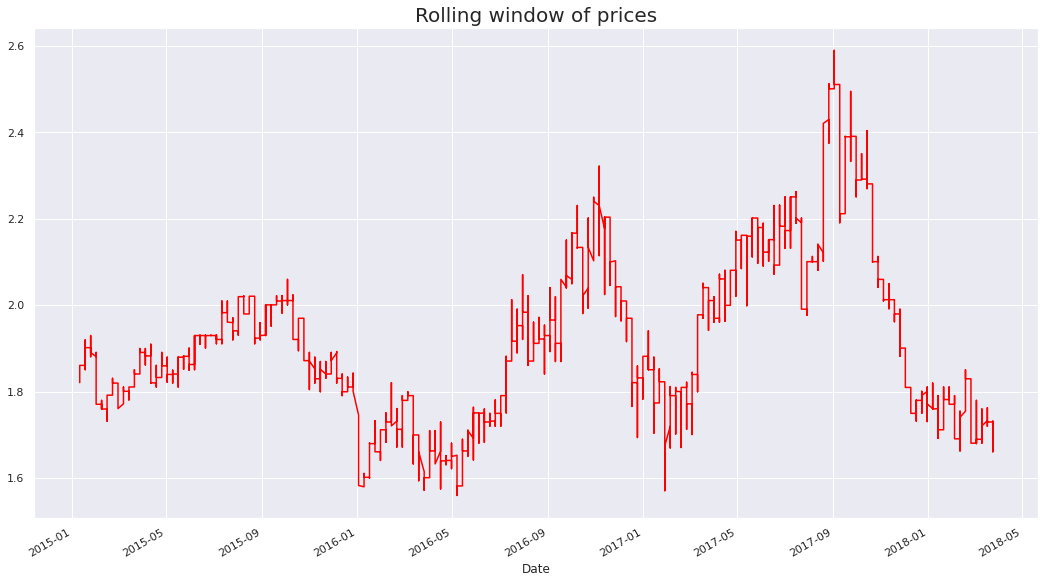

In [76]:
fig = plt.figure(figsize = (18,10))
df.AveragePrice.rolling(150).quantile(.9).plot(color = 'red')
plt.title('Rolling window of prices', fontsize = 20)


## Data Exploration

### Comparison of Organic and Conventional  Avocado Prices 

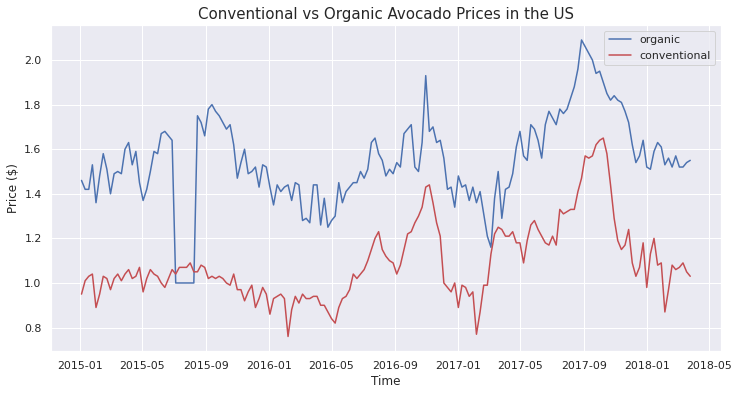

In [77]:
organic = df.loc[(df['region'] == "TotalUS") & (df['type'] == "organic")]
conv = df.loc[(df['region'] == "TotalUS") & (df['type'] == "conventional")]

plt.figure(figsize=(12,6))
plt.plot(organic.index, organic['AveragePrice'], label="organic", color='b')
plt.plot(conv.index, conv['AveragePrice'], label="conventional", color='r')
plt.legend()
plt.title("Conventional vs Organic Avocado Prices in the US", fontsize=15)
plt.xlabel("Time")
plt.ylabel("Price ($)")
plt.show()

#### We can observe that:
1. Generally, organic and conventional avocado prices have similar fluctuations.
2. There is a sudden drop in organic prices in August 2015.

### Comparison of Prices for Avocado in New York, Boston, Dallas and Total US

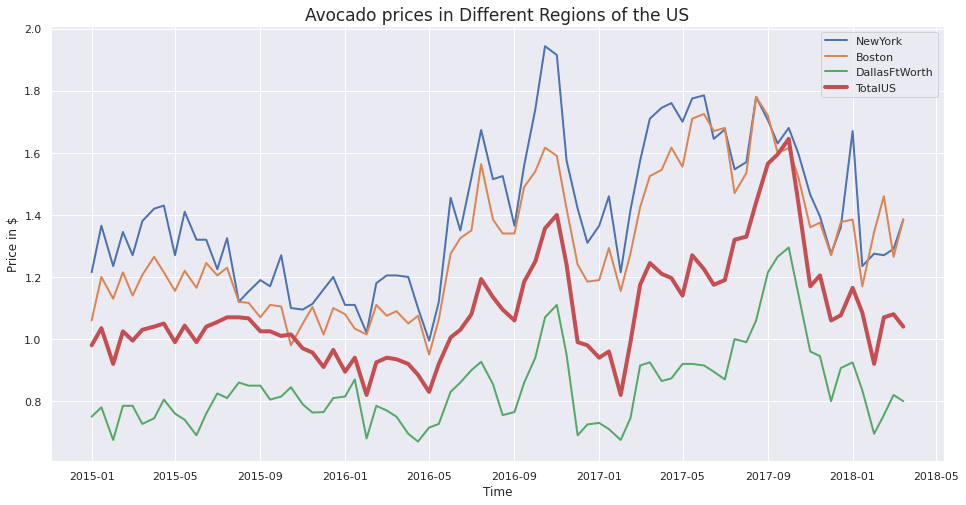

In [78]:
conventional = df.loc[df['type'] == "conventional"]

plt.figure(figsize=(16,8))

cities = ["NewYork", "Boston", "DallasFtWorth", "TotalUS"]
for c in cities:
    data = conventional.loc[conventional['region'] == c]
    data = data['AveragePrice'].resample("SMS").mean()
    if c == "TotalUS":
        linewidth = 4
    else:
        linewidth = 2
    plt.plot(data.index, data, label=c, linewidth=linewidth)

plt.legend()
plt.title("Avocado prices in Different Regions of the US", fontsize=17)
plt.xlabel("Time")
plt.ylabel("Price in $")
plt.show()

- New York has the highest prices
- Dallas has the lowest prices

## Time-series Analysis

In [79]:
conv.index.min()

Timestamp('2015-01-04 00:00:00')

In [80]:
conv.index.max()

Timestamp('2018-03-25 00:00:00')

* Date range: Jan 2015 to March 2018

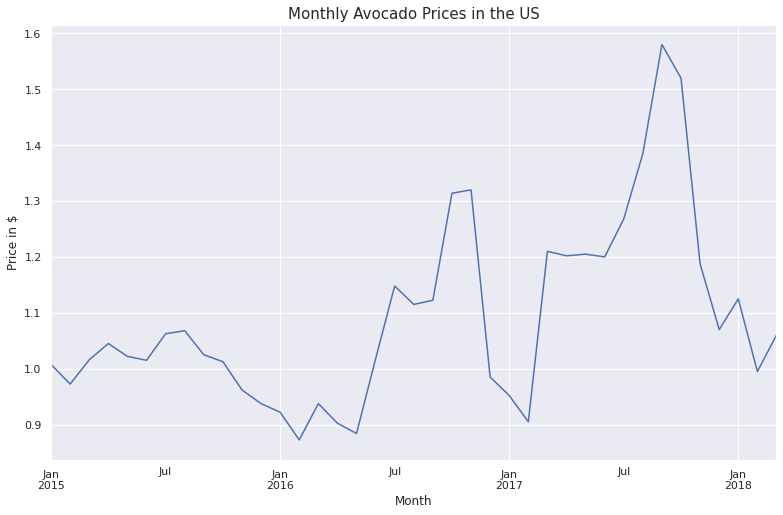

In [81]:
y = conv['AveragePrice'].resample("MS").mean()
plt.figure(figsize=(13,8))
y.plot()
plt.title("Monthly Avocado Prices in the US", fontsize=15)
plt.xlabel("Month")
plt.ylabel("Price in $")
plt.show()

### Seasonal decomposition

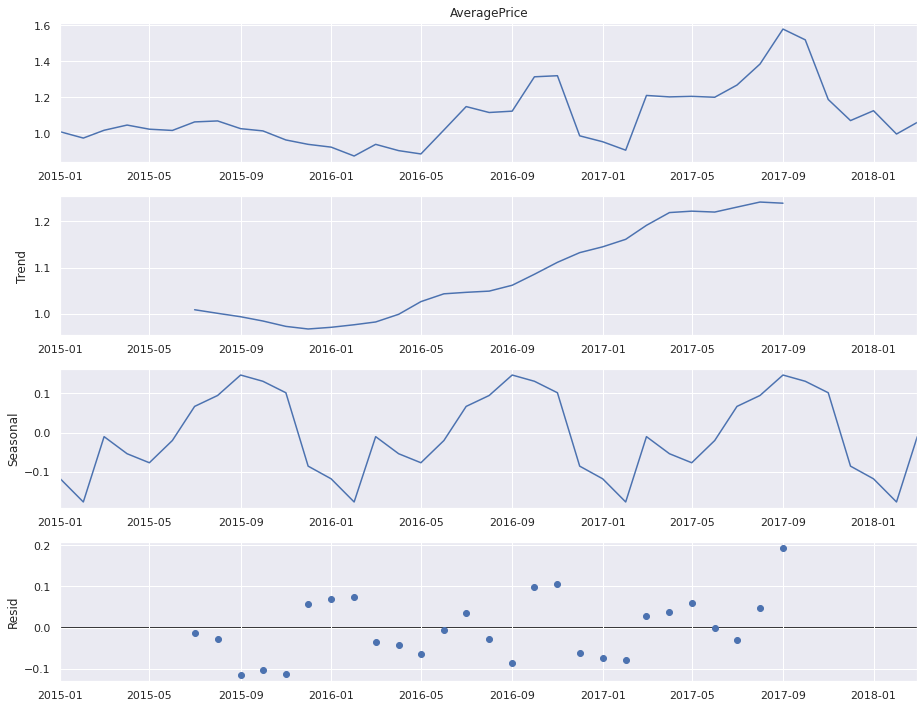

In [82]:
rcParams['figure.figsize'] = 13, 10

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

#### We can observe that
* The fluctuation in prices is *seasonal*
* The trend in price is overall *increasing*

###  ARIMA Model

In [83]:
conventional = df[(df.region == 'TotalUS')&(df.type == 'conventional')]
conventional = conventional.drop(columns = ['Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region'])

In [84]:
#ARIMA
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))
 
# evaluate parameters
p_values = range(0, 4)
d_values = range(0, 4)
q_values = range(0, 4)
warnings.filterwarnings("ignore")
evaluate_models(conventional.values, p_values, d_values, q_values)

Best ARIMANone MSE=inf


In [85]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
 
from sklearn.metrics import mean_squared_error

# instantiate the ARIMA model
model = ARIMA(conventional['AveragePrice'], order = (1, 0, 0))
 
# fit the model
results_ARIMA = model.fit()
 
# collect the predicted results, rounding to two to indicate dollars and cents
predictions = round(results_ARIMA.predict(), 2)
 
# put the predictions into a DataFrame with Date and Predicted Price columns
preds = pd.DataFrame(list(zip(list(predictions.index),list(predictions))),columns=['Date',
'PredictedPrice']).set_index('Date')
 
# combine the original data set with the predicted data
predicted_df = pd.merge(conventional[1:], preds, left_index=True, right_index=True)


In [86]:
print("\tMean Squared Error:", mean_squared_error(predicted_df['AveragePrice'], predicted_df['PredictedPrice']))
print("\tRoot Mean Squared Error:", np.sqrt(mean_squared_error(predicted_df['AveragePrice'],
predicted_df['PredictedPrice'])))

	Mean Squared Error: 0.004301785714285715
	Root Mean Squared Error: 0.06558799977347773


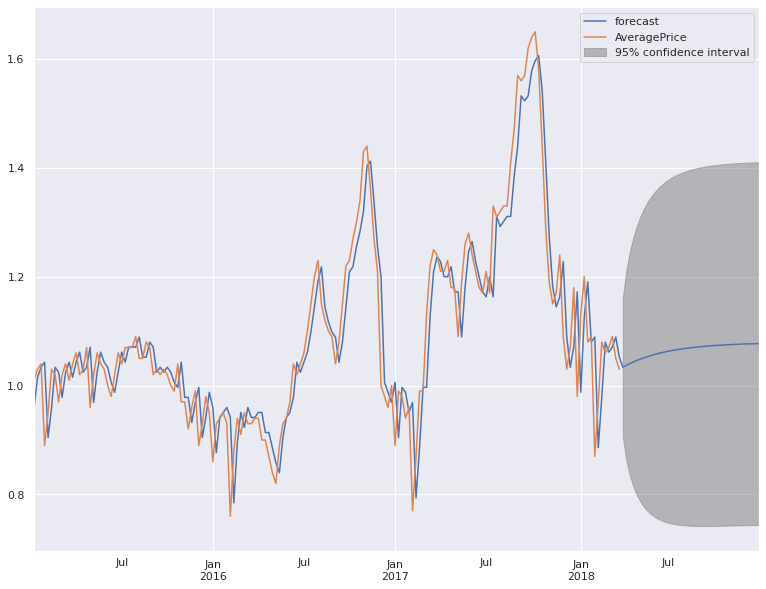

In [87]:
results_ARIMA.plot_predict(start='2015-01-11', end = '2018-12-30')
plt.show()

In [88]:
# grab the forecast from the model out 40 steps to 2018-12-30, and create a Series out of the data
ARIMA_forecast = pd.Series(results_ARIMA.forecast(steps = 40)[0])
 
# create an index from the end of the data out to the length of the forecast on a weekly basis
idx = pd.date_range('2018-04-01', '2018-12-30', freq='W')
 
# create a DataFrame combining the index above and the forecast prices
ARIMA_forecast = pd.DataFrame(list(zip(list(idx),list(ARIMA_forecast))),columns=['Date','ForecastPrice']).set_index('Date')


In [89]:
#SARIMAX
# instantiate the model using the ARIMA order we had earlier
mod = sm.tsa.statespace.SARIMAX(conventional['AveragePrice'], order=(1, 0, 0), seasonal_order=(1, 0, 0, 52), enforce_stationarity=False, enforce_invertibility=False)
 
# fit the model
SARIMAX_results = mod.fit()
 
# store the predictions from the model rounding to two for dollars and cents
SARIMAX_predictions = round(SARIMAX_results.predict(), 2)
 
# create a DataFrame with Date and Predicted Price
SARIMAX_preds = pd.DataFrame(list(zip(list(SARIMAX_predictions.index),list(SARIMAX_predictions))), columns=['Date','PredictedPrice']).set_index('Date')
 
# merge the original DataFrame with the predictions
SARIMAX_predicted_df = pd.merge(conventional[1:], SARIMAX_preds, left_index=True, right_index=True)


In [90]:
print("\tMean Squared Error:", mean_squared_error(SARIMAX_predicted_df['AveragePrice'], SARIMAX_predicted_df['PredictedPrice']))
print("\tRoot Mean Squared Error:", np.sqrt(mean_squared_error(SARIMAX_predicted_df['AveragePrice'], SARIMAX_predicted_df['PredictedPrice'])))

	Mean Squared Error: 0.00604047619047619
	Root Mean Squared Error: 0.07772050045178679


In [91]:
SARIMAX_forecast = pd.DataFrame(round(SARIMAX_results.forecast(steps = 40), 2), columns = ['Forecasted Price'])
SARIMAX_forecast

,Forecasted Price
2018-04-01,1.01
2018-04-08,1.01
2018-04-15,1.02
2018-04-22,0.99
2018-04-29,0.98
2018-05-06,0.93
2018-05-13,0.99
2018-05-20,1.03
2018-05-27,1.03
2018-06-03,1.01


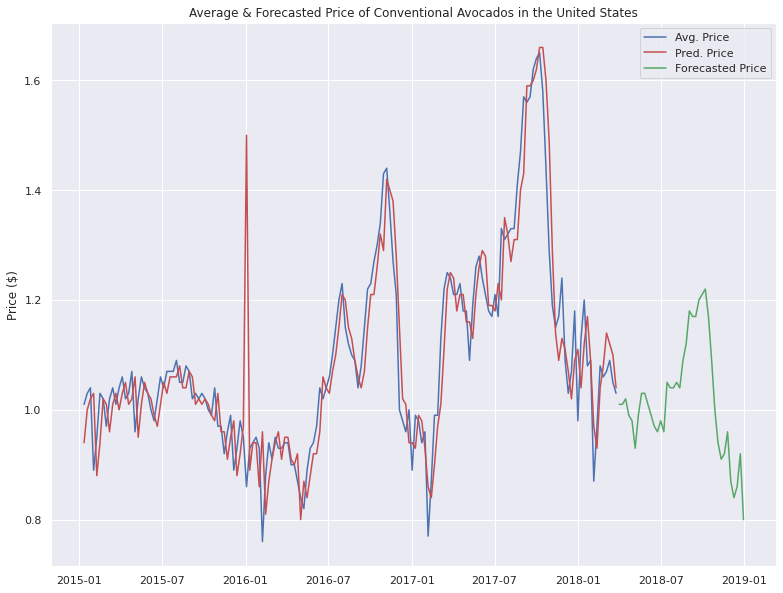

In [92]:
fig=plt.figure()
fig.show()
ax=fig.add_subplot(111)

ax.plot(SARIMAX_predicted_df['AveragePrice'],c='b',label='Avg. Price')
ax.plot(SARIMAX_predicted_df['PredictedPrice'],c='r', label='Pred. Price')
ax.plot(SARIMAX_forecast['Forecasted Price'],c='g', label='Forecasted Price')

plt.legend(loc='best')
plt.ylabel('Price ($)')
plt.title('Average & Forecasted Price of Conventional Avocados in the United States')
plt.draw()

In [93]:
model = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=True,
                                enforce_invertibility=False)
results = model.fit()
results.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
ar.L1,0.7217,0.315,2.289,0.022,0.104,1.340
ma.L1,-1.0004,45.347,-0.022,0.982,-89.880,87.879
ar.S.L12,-0.6012,0.312,-1.926,0.054,-1.213,0.011
sigma2,0.0125,0.569,0.022,0.983,-1.102,1.127


In [94]:
# Check for convergence
results.mle_retvals

{'fopt': -0.41771917968696004,
 'gopt': array([ 6.46773690e-05, -1.42826051e-04,  7.95428556e-05,  2.50577975e-04]),
 'fcalls': 195,
 'warnflag': 0,
 'converged': True,
 'iterations': 26}

#### After 27 iterations, the model converged with the optimal values (1, 1, 1) x (1, 1, 0, 12). We will use this for our predictive model.

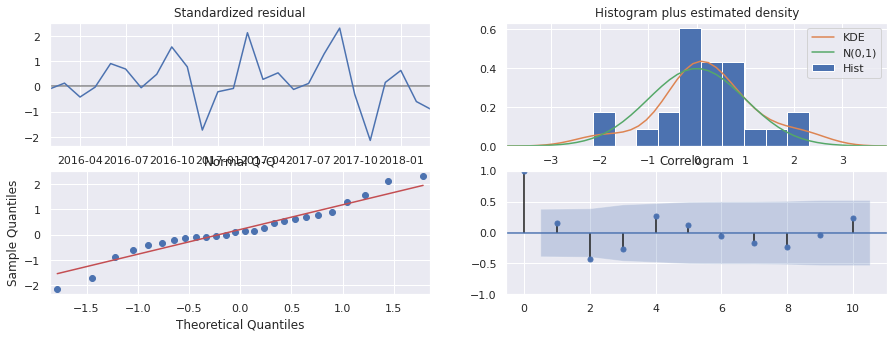

In [95]:
results.plot_diagnostics(figsize=(15, 5))
plt.show()

#### The model residuals almost follow a normal distribution

### Comparison of Predicted prices and True prices for Avocaodos 

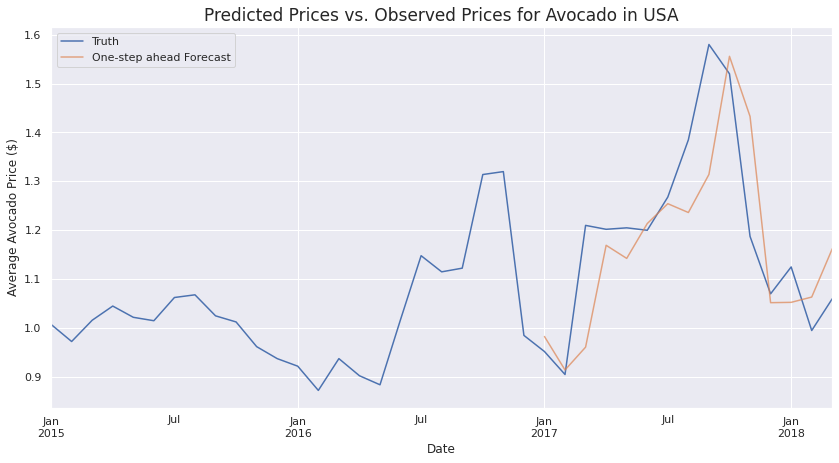

In [96]:
pred_date = '2017-01-01'
pred = results.get_prediction(start=pd.to_datetime(pred_date), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2015':].plot(label='Truth')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
#ax.fill_between(pred_ci.index,
#                pred_ci.iloc[:, 0],
#                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Average Avocado Price ($)')
plt.title("Predicted Prices vs. Observed Prices for Avocado in USA", fontsize=17)
plt.legend()
plt.show()

#### Although the forecasted values are not exactly the same, they follow the upward then downward trend of the observed data.

### Evaluation

### Future Forecasting

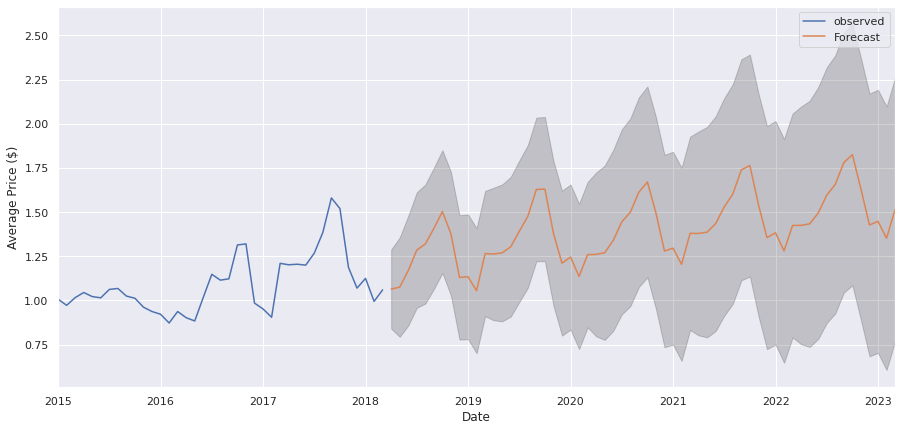

In [97]:
pred_uc = results.get_forecast(steps=60)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(15, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Average Price ($)')
plt.legend()
plt.show()

#### The predictive model captures both the seasonality and the overall increasing trend of the price values.